## 1. Import Libraries

#### Let us import the required libraries and functions

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import scipy.stats

import warnings
warnings.filterwarnings('ignore')

## 2. Read Data
### Read and display data to gey insights from the data

In [2]:
data  = pd.read_csv('airline_passenger_satisfaction.csv') # read csv file using pandas
data.head() # display first 5 records of the dataframe

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


## 3. Data Analysis and Preparation
### Data preparation is the process of cleaning and transforming raw data prior to building predictive models.
### Here we will analyze and prepare data to perform regression analysis:
1. Check dimensions of the dataframe in terms of rows and columns
2. Check the data types. Refer data definition to ensure your data types are correct
3. If data types are not as per business context, change the data types as per requirement
4. Study summary statistics
5. Check for missing values
6. Study correlation
7. Analyze categorical variables
8. Analyze relationship between target variable and categorical variables
9. Perform feature engineering
10. Detect outliers
11. Recheck the correlation

### 3.1.1 Data Dimension

To Know the dimensions od the data:

In [3]:
data.shape #.shape returns the dimension of the data

(129880, 24)

We see the dataframe has `24` **columnns** and `129880` **observations**.

### 3.1.2 Data Types
In this section we will:

    1. check data types 

    2. Change incorrect data types
    
    3. Recheck the data types

In [4]:
data.dtypes # check types of data

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


Using the __*info function*__, we can pull the following information from our dataset :
>- We have __5 categorical variables__ and __19 numerical variables__
>- As data defination Departure Delay information in minutes, so dtypes will be float 
>- change dtypes of departure delay in float

In [5]:
data['Departure Delay'] = data['Departure Delay'].astype('float64')

In [6]:
## Recheck data types 
data.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                           float64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


In [7]:
data = data.drop('ID', axis = 1) # droping unnecessary parameter

## Summary Statistics
In our dataset we have numrecial and categorical variables. Now check for summary statistics of all variables

In [8]:
data.describe().T # for numerical variable

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Departure Delay,129880.0,14.713713,38.071126,0.0,0.0,0.0,12.0,1592.0
Arrival Delay,129487.0,15.091129,38.465650,0.0,0.0,0.0,13.0,1584.0
Departure and Arrival Time Convenience,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Ease of Online Booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
Check-in Service,129880.0,3.306267,1.266185,0.0,3.0,3.0,4.0,5.0
Online Boarding,129880.0,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
Gate Location,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
On-board Service,129880.0,3.383023,1.287099,0.0,2.0,4.0,4.0,5.0


In [9]:
data.describe(include='object') # for categorical data

,Gender,Customer Type,Type of Travel,Class,Satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Returning,Business,Business,Neutral or Dissatisfied
freq,65899,106100,89693,62160,73452


### 0) Find any missing values, and outliers if any in the continuous field

## Missing Values
#### 	In order to get the count of missing values in each column, we use the in-built function .isnull().sum()

In [11]:
data.isnull().sum() # Checking for missing values

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

There is `393` null value present in column `Arrival Delay`.

In [12]:
# fill the missing values with the mean value of 'Arrival Delay' using 'fillna()'
# mean(): returns the mean Arrival Delay
data['Arrival Delay'] = data['Arrival Delay'].fillna(data['Arrival Delay'].mean())

In [24]:
## Check again for null values
data.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

Now, we obtain the dataset with no missing values.

## Preprocessing

In [25]:
## Check unique values for columns
{column: list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': ['Male', 'Female'],
 'Customer Type': ['First-time', 'Returning'],
 'Type of Travel': ['Business', 'Personal'],
 'Class': ['Business', 'Economy', 'Economy Plus'],
 'Satisfaction': ['Neutral or Dissatisfied', 'Satisfied']}

In [28]:
df = pd.get_dummies(data,columns=['Gender','Customer Type','Type of Travel','Class'],drop_first=True)

In [59]:
df.head()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus
0,48,821,2.0,5.0,3,3,4,3,3,3,...,5,3,5,5,Neutral or Dissatisfied,1,0,0,0,0
1,35,821,26.0,39.0,2,2,3,5,2,5,...,5,2,5,5,Satisfied,0,1,0,0,0
2,41,853,0.0,0.0,4,4,4,5,4,3,...,3,4,3,3,Satisfied,1,1,0,0,0
3,50,1905,0.0,0.0,2,2,3,4,2,5,...,5,2,5,5,Satisfied,1,1,0,0,0
4,49,3470,0.0,1.0,3,3,3,5,3,3,...,3,3,3,3,Satisfied,0,1,0,0,0


In [63]:
numrical_df = df.copy()

## Outlier Detection

In [60]:
X = df.drop('Satisfaction', axis=1).copy()
columns = [column for column in X.columns if len(X[column].unique())>2] #select columns having more than 2 unique values

In [61]:
len(columns)

18

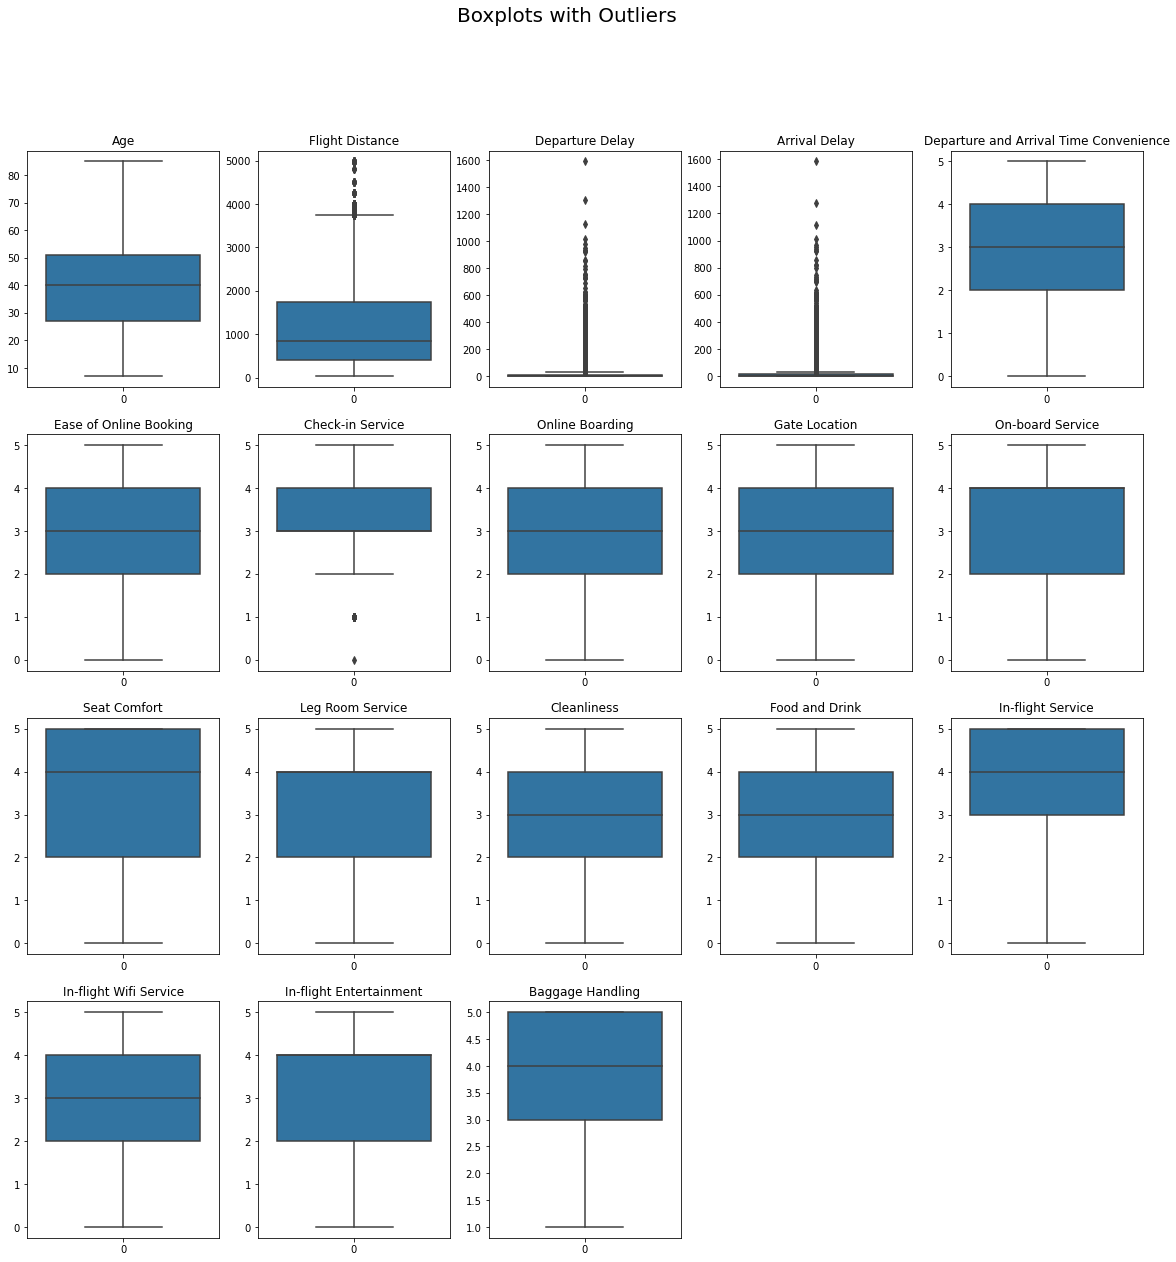

In [62]:
# visualizating outliers using boxplot
plt.figure(figsize=(20,20))

for i, column in enumerate(columns):
    plt.subplot(4,5, i+1)
    sns.boxplot(data = X[column])
    plt.title(column)

plt.suptitle('Boxplots with Outliers',size=20)
plt.show()

In [261]:
threshold = 0.03

In [262]:
lower_bound = scipy.stats.norm.ppf(q=(threshold/2),loc=0,scale=1) 
lower_bound

-2.1700903775845606

In [263]:
upper_bound = scipy.stats.norm.ppf(q=1-(threshold/2),loc=0,scale=1)
print(upper_bound)

2.17009037758456


In [64]:
#removing outliers
def remove_outliers(df, columns, threshold):
    df = df.copy()
    # Calculate the lower and upper bond
    lower_bound = scipy.stats.norm.ppf(q=(threshold/2),loc=0,scale=1) 
    print(lower_bound)
    upper_bound = scipy.stats.norm.ppf(q=1-(threshold/2),loc=0,scale=1)
    print(upper_bound)
    # Calcuate z-score
    outlier_df = df.loc[:,columns].copy()
    z_scores = pd.DataFrame(scipy.stats.zscore(outlier_df,axis=0), index= outlier_df.index, columns=outlier_df.columns)
    # get indices of all outliers
    lower_outliers = (z_scores < lower_bound).any(axis=1)
    upper_outliers = (z_scores >= upper_bound).any(axis=1)
    outliers = df[pd.concat([lower_outliers,upper_outliers],axis=1).any(axis=1)].index
    
    #drop the outliers
    df = df.drop(outliers,axis=0).reset_index(drop=True)
    return df

`threshold` is giving us where along x-axis are we going to make the cut when we going to say these are outliers and thesea aren't.
6% is the part of data that we are looking for outliers.

In [65]:
removed_outlier_df = remove_outliers(df=df,
               columns=['Flight Distance',
                       'Departure Delay',
                       'Check-in Service',
                       'Arrival Delay'],
               threshold=0.06)

-1.880793608151251
1.8807936081512509


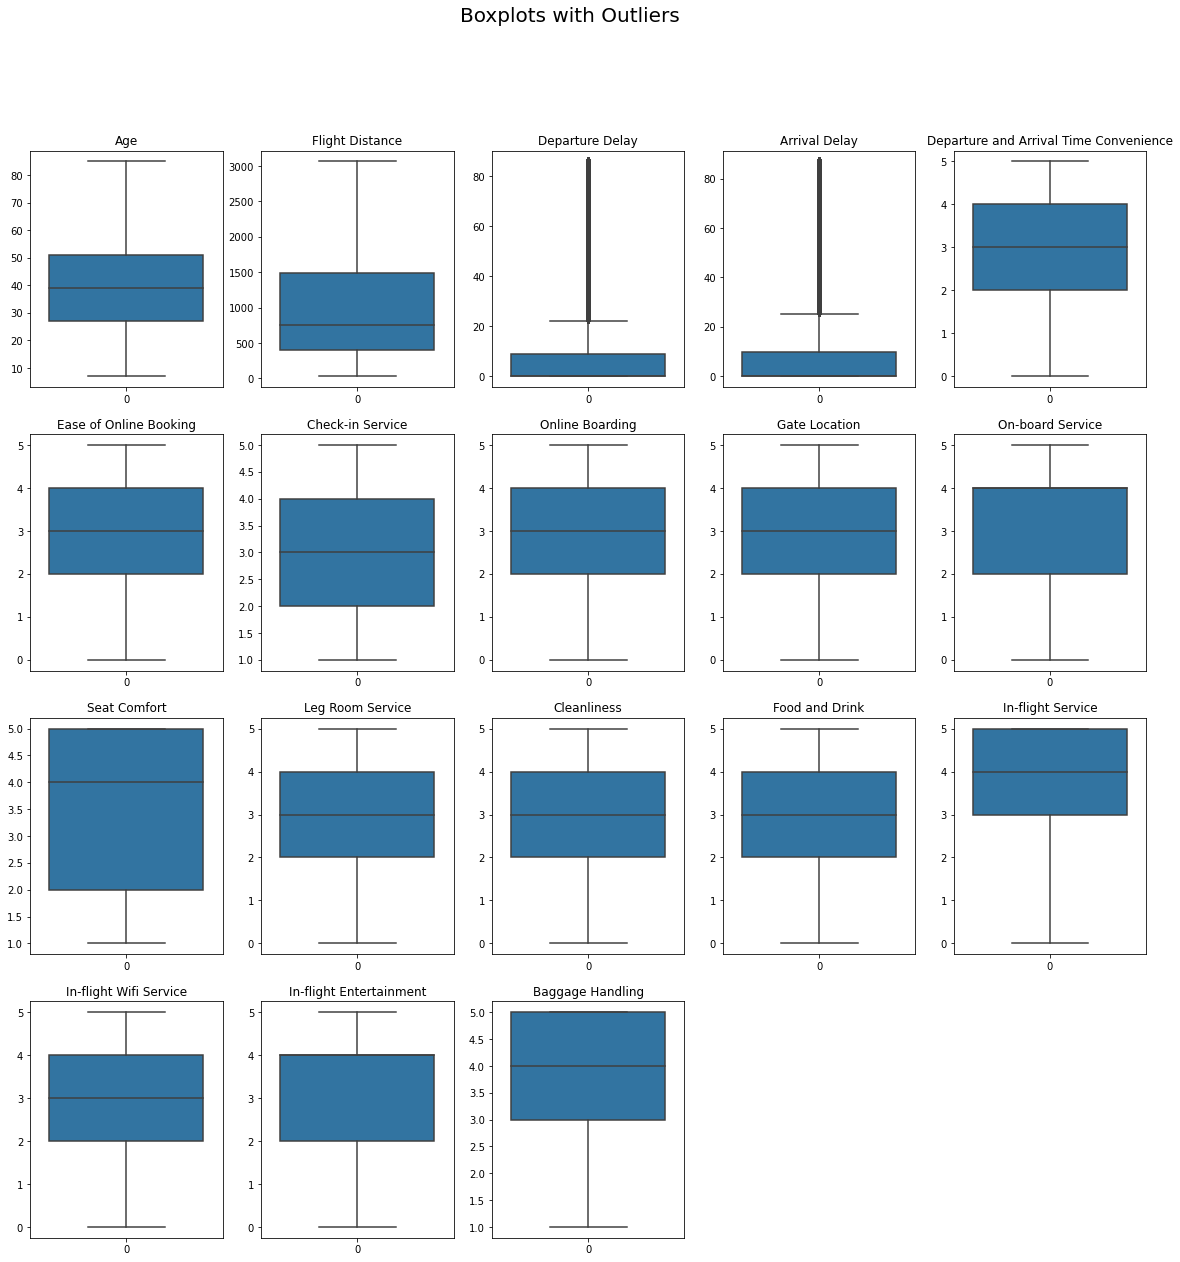

In [66]:
# After removing outliers again visualizing 
plt.figure(figsize=(20,20))

for i, column in enumerate(columns):
    plt.subplot(4,5, i+1)
    sns.boxplot(data = removed_outlier_df[column])
    plt.title(column)

plt.suptitle('Boxplots with Outliers',size=20)
plt.show()

Apply another method using `IQR Method` for removing outliers

In [252]:
# calculate interquartile range 

# compute the first quartile using quantile(0.25)
# use .drop() to drop the target variable 
# axis=1: specifies that the labels are dropped from the columns
Q1 = numrical_df.drop(['Satisfaction'], axis=1).quantile(0.25)

# compute the first quartile using quantile(0.75)
# use .drop() to drop the target variable 
# axis=1: specifies that the labels are dropped from the columns
Q3 = numrical_df.drop(['Satisfaction'], axis=1).quantile(0.75)

# calculate of interquartile range 
IQR = Q3 - Q1

# print the IQR values for numeric variables
print(IQR)

Age                                         24.0
Flight Distance                           1330.0
Departure Delay                             12.0
Arrival Delay                               13.0
Departure and Arrival Time Convenience       2.0
Ease of Online Booking                       2.0
Check-in Service                             1.0
Online Boarding                              2.0
Gate Location                                2.0
On-board Service                             2.0
Seat Comfort                                 3.0
Leg Room Service                             2.0
Cleanliness                                  2.0
Food and Drink                               2.0
In-flight Service                            2.0
In-flight Wifi Service                       2.0
In-flight Entertainment                      2.0
Baggage Handling                             2.0
Gender_Male                                  1.0
Customer Type_Returning                      0.0
Type of Travel_Perso

In [250]:
# filter out the outlier values
# ~ : selects all rows which do not satisfy the condition
# |: bitwise operator OR in python
# any() : returns whether any element is True over the columns
# axis : "1" indicates columns should be altered (use "0" for 'index')
df1 = numrical_df[~((numrical_df < (Q1 - 1.5 * IQR)) | (numrical_df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus
2,41,853,0.0,0.0,4,4,4,5,4,3,...,3,4,3,3,Satisfied,1,1,0,0,0
3,50,1905,0.0,0.0,2,2,3,4,2,5,...,5,2,5,5,Satisfied,1,1,0,0,0
4,49,3470,0.0,1.0,3,3,3,5,3,3,...,3,3,3,3,Satisfied,0,1,0,0,0
6,43,1963,0.0,0.0,3,3,4,4,3,5,...,5,3,5,5,Satisfied,1,1,0,0,0
7,60,853,0.0,3.0,3,4,3,4,4,3,...,3,4,3,3,Satisfied,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129860,30,337,0.0,0.0,2,2,4,5,2,3,...,4,2,5,5,Satisfied,0,1,0,0,0
129861,39,2667,1.0,0.0,0,0,5,5,1,3,...,3,0,3,3,Satisfied,0,1,0,0,0
129862,51,308,0.0,0.0,4,4,4,5,4,5,...,5,4,5,5,Satisfied,1,1,0,0,0
129863,39,2747,0.0,0.0,1,5,3,4,1,5,...,5,1,5,5,Satisfied,0,1,0,0,0


In [69]:
numrical_df.shape

(129880, 24)

In [71]:
df1.shape

(70608, 24)

In [124]:
# final data 
final_df = removed_outlier_df.copy()

In [125]:
final_df['Satisfaction'] = final_df['Satisfaction'].replace({'Neutral or Dissatisfied':0,'Satisfied':1})

##### After removing outliers we will check shape of dimension of the data 

In [126]:
df.shape

(129880, 24)

In [127]:
final_df.shape

(114496, 24)

In [128]:
final_df.head()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus
0,48,821,2.0,5.0,3,3,4,3,3,3,...,5,3,5,5,0,1,0,0,0,0
1,35,821,26.0,39.0,2,2,3,5,2,5,...,5,2,5,5,1,0,1,0,0,0
2,41,853,0.0,0.0,4,4,4,5,4,3,...,3,4,3,3,1,1,1,0,0,0
3,50,1905,0.0,0.0,2,2,3,4,2,5,...,5,2,5,5,1,1,1,0,0,0
4,43,1963,0.0,0.0,3,3,4,4,3,5,...,5,3,5,5,1,1,1,0,0,0


## Check for Normailty

    As per data information we have only `Age`,`Flight distance`, `Departure Delay`, `Arrival Delay` having continuous nature in data,
    so we will check for these features only.

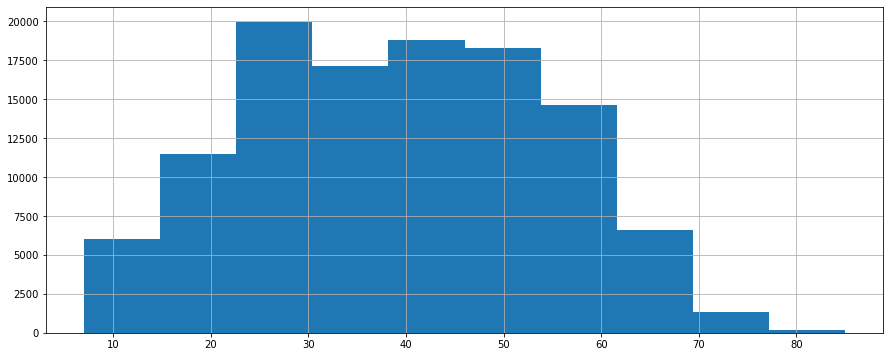

In [129]:
## check for normality of continuous variables using histgrom plot
# For Age 
plt.figure(figsize=(15,6))
final_df.Age.hist()
plt.show()

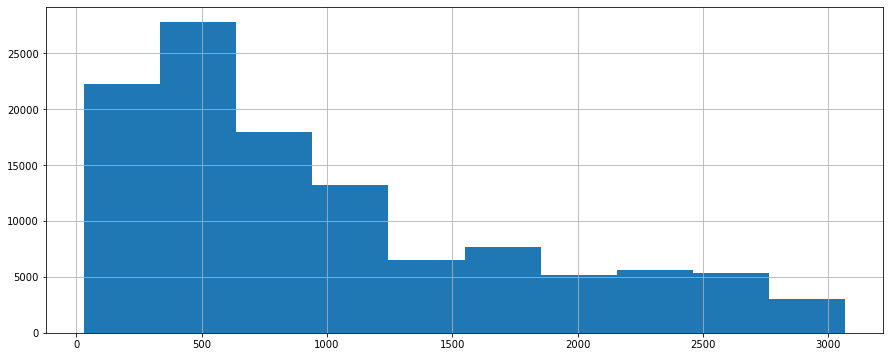

In [130]:
# for Flight Distance
plt.figure(figsize=(15,6))
final_df['Flight Distance'].hist()
plt.show()

After visulazing hsitogram plot, we can say that flight distance feature having right-skewed in nature

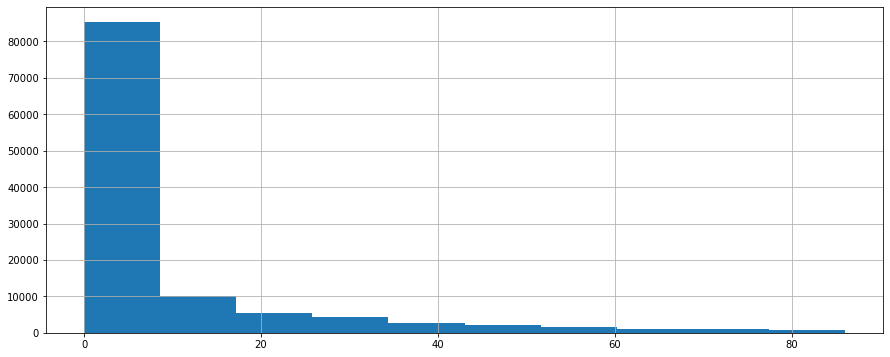

In [131]:
# for Departure Delay
plt.figure(figsize=(15,6))
final_df['Departure Delay'].hist()
plt.show()

After visulazing hsitogram plot, we can say that Departure Delay feature having right-skewed in nature

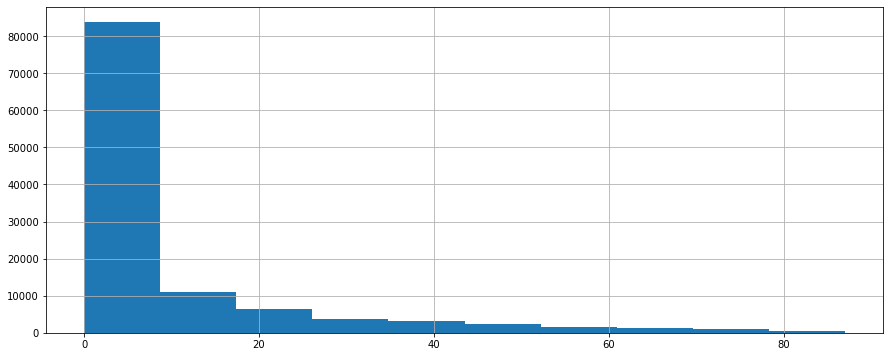

In [132]:
# for Arrival Delay
plt.figure(figsize=(15,6))
final_df['Arrival Delay'].hist()
plt.show()

After visulazing hsitogram plot, we can say that Arrival Delay feature having right-skewed in nature

#### We should not only make conclusions through visual representations or only using a statistical test but perform multiple ways to get the best insights

In [133]:
from scipy.stats import jarque_bera
from scipy import stats
## Let us perform the Jarque-Bera test to check the normality
# normality test using jarque_bera()
# the test returns the the test statistics and the p-value of the test
stat, p = jarque_bera(final_df["Age"])

# to print the numeric outputs of the Jarque-Bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=2684.631, p-value=0.000
The data is not normally distributed (reject H0)


In [134]:
stat, p = jarque_bera(final_df["Flight Distance"])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=17378.421, p-value=0.000
The data is not normally distributed (reject H0)


In [135]:
stat, p = jarque_bera(final_df["Departure Delay"])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=283038.162, p-value=0.000
The data is not normally distributed (reject H0)


In [136]:
stat, p = jarque_bera(final_df["Arrival Delay"])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=253483.168, p-value=0.000
The data is not normally distributed (reject H0)


Now we already checked contiuous nature feature is not normally distributed. 
To make normally distributed we will apply `log` in each feature.

# log transformation for normality using np.log()
final_df['log_age'] = np.log(final_df['Age'])
final_df['log_flight_distance'] = np.log(final_df['Flight Distance'])
final_df['log_departure_delay'] = np.log(final_df['Departure Delay'])
final_df['log_arrival_delay'] = np.log(final_df['Arrival Delay'])

## Spliting Train and Test Data

In [176]:
X = final_df.drop('Satisfaction',axis=1)
y = final_df['Satisfaction']

In [177]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [178]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1) # splitting data into 90:10 parts

In [179]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [180]:
X_train.shape,y_train.shape

((103046, 23), (103046,))

In [181]:
X_test.shape,y_test.shape

((11450, 23), (11450,))

#### 1) Build a model using all the fields (doing appropriate conversions)

1a) Logistic Regression

1b) Decision Tree,

1c) Randomforest

1d) Naive Bayes

1e) AdaBoost, GDBoost, XGBoost

## Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [144]:
ypred = lr.predict(X_test)

In [145]:
print("accuracy_score for logistic regression", round(accuracy_score(ypred,y_test),2))

accuracy_score for logistic regression 0.87


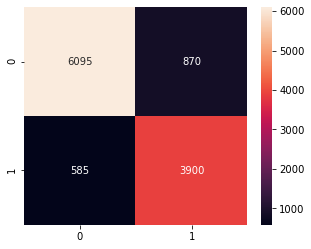

In [146]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(ypred,y_test),annot=True,fmt='g')
plt.show()

## Decision Tree

In [147]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [148]:
ypred = dt.predict(X_test)

In [149]:
print("accuracy_score for decision tree", round(accuracy_score(ypred,y_test),2))

accuracy_score for decision tree 0.94


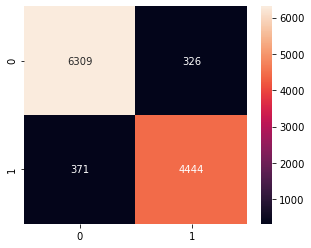

In [150]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(ypred,y_test),annot=True,fmt='g')
plt.show()

## Random Forest 

In [151]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [152]:
ypred = rf.predict(X_test)
print("accuracy_score for Random Forest", round(accuracy_score(ypred,y_test),2))

accuracy_score for Random Forest 0.96


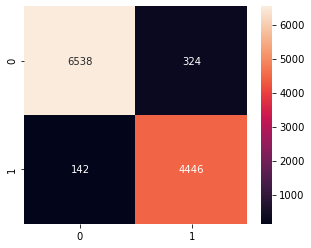

In [153]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(ypred,y_test),annot=True,fmt='g')
plt.show()

## Navie Bayes

In [154]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [155]:
ypred = model.predict(X_test)
print("accuracy_score for Navie Bayes", round(accuracy_score(ypred,y_test),2))

accuracy_score for Navie Bayes 0.86


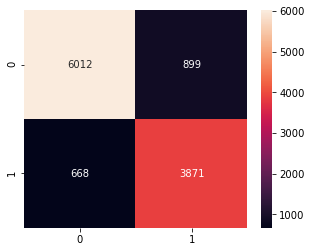

In [156]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(ypred,y_test),annot=True,fmt='g')
plt.show()

## AdaBoost

In [157]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [158]:
ypred = ada.predict(X_test)
print("accuracy_score for AdaBoost", round(accuracy_score(ypred,y_test),2))

accuracy_score for AdaBoost 0.92


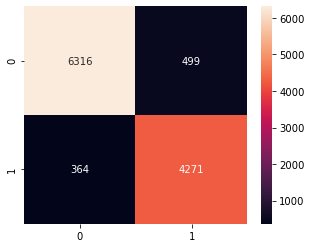

In [159]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(ypred,y_test),annot=True,fmt='g')
plt.show()

## GDBoost

In [160]:
from sklearn.ensemble import GradientBoostingClassifier
gdb = GradientBoostingClassifier()
gdb.fit(X_train,y_train)

GradientBoostingClassifier()

In [161]:
ypred = gdb.predict(X_test)
print("accuracy_score for GDBoost", round(accuracy_score(ypred,y_test),2))

accuracy_score for GDBoost 0.94


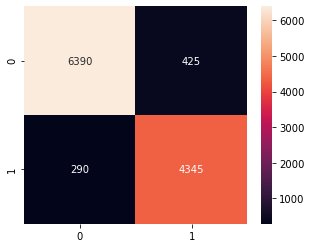

In [162]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(ypred,y_test),annot=True,fmt='g')
plt.show()

## XGBoost

In [163]:
#pip install xgboost

In [164]:
from xgboost import XGBClassifier

In [165]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [166]:
ypred = xgb.predict(X_test)
print("accuracy_score for XGBoost", round(accuracy_score(ypred,y_test),2))

accuracy_score for XGBoost 0.96


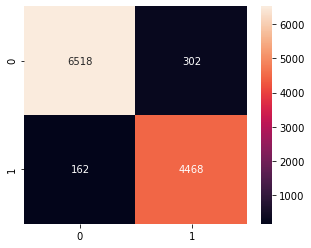

In [167]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(ypred,y_test),annot=True,fmt='g')
plt.show()

## Hyper parameter Tuning using GridSearch and RandomSearch for RandomForest, GradientBoost, xgboost, and adaboost.

### `GridSearch` uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters.


#### GridSearchCV for RandomForest

from sklearn.model_selection import GridSearchCV
## Building Random Forest Classifier
rfc = RandomForestClassifier()

# Initializing GridSearchCV() object and fitting it with hyperparameters
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

clf = GridSearchCV(rfc, param_grid, cv = 10, scoring='accuracy')

clf.fit(X_train, y_train)

## Getting the Best Hyperparameters
print(clf.bes)

#### RandomizedSearchCV for RandomForest

from sklearn.model_selection import RandomizedSearchCV

#### 2) Find fields that are dependent using chi square (for categorical variables)

The Chi-square test is a non-parametric statistical test that enables us to understand the relationship between the categorical variables of the dataset.

In [188]:
from scipy.stats import chi2_contingency

In [169]:
cat_val = data.select_dtypes("object")

In [170]:
cat_val.head()

,Gender,Customer Type,Type of Travel,Class,Satisfaction
0,Male,First-time,Business,Business,Neutral or Dissatisfied
1,Female,Returning,Business,Business,Satisfied
2,Male,Returning,Business,Business,Satisfied
3,Male,Returning,Business,Business,Satisfied
4,Female,Returning,Business,Business,Satisfied


#### Chi square test for target variable "Satisfaction" column.

In [212]:
cat_table = pd.crosstab(cat_val['Type of Travel'],cat_val['Satisfaction'])
chi2, p, dof, expected  = chi2_contingency(cat_table.values)
print('chi-sqaure statistics %0.3f and p_value %0.2f'%(chi2,p))

chi-sqaure statistics 26282.521 and p_value 0.00


As we know that if p-value is less than alpha(0.05),then we reject null hypothesis. Therefore we can say that Satisfaction and Type of travel is dependent each other.

In [200]:
cat_table = pd.crosstab(cat_val['Class'],cat_val['Satisfaction'])
chi2, p, dof, expected  = chi2_contingency(cat_table.values)
print('chi-sqaure statistics %0.3f and p_value %0.2f'%(chi2,p))

chi-sqaure statistics 32906.172 and p_value 0.00


As we know that if p-value is less than alpha(0.05),then we reject null hypothesis. Therefore we can say that Satisfaction and Class is dependent each other.

In [199]:
cat_table = pd.crosstab(cat_val['Gender'],cat_val['Satisfaction'])
chi2, p, dof, expected  = chi2_contingency(cat_table.values)
print('chi-sqaure statistics %0.3f and p_value %0.2f'%(chi2,p))

chi-sqaure statistics 16.352 and p_value 0.00


As we know that if p-value is less than alpha(0.05),then we reject null hypothesis. Therefore we can say that Satisfaction and Gender is dependent each other.

In [198]:
cat_table = pd.crosstab(cat_val['Customer Type'],cat_val['Satisfaction'])
chi2, p, dof, expected  = chi2_contingency(cat_table.values)
print('chi-sqaure statistics %0.3f and p_value %0.2f'%(chi2,p))

chi-sqaure statistics 4493.189 and p_value 0.00


As we know that if p-value is less than alpha(0.05),then we reject null hypothesis. Therefore we can say that Satisfaction and Customer Type is dependent each other.

### Chi square test for independent column.

### for Gender

In [202]:
cat_table = pd.crosstab(cat_val['Gender'],cat_val['Type of Travel'])
chi2, p, dof, expected  = chi2_contingency(cat_table.values)
print('chi-sqaure statistics %0.3f and p_value %0.2f'%(chi2,p))

chi-sqaure statistics 11.687 and p_value 0.00


As we know that if p-value is less than alpha(0.05),then we reject null hypothesis. Therefore we can say that Gender and Type of travel is dependent each other.

In [203]:
cat_table = pd.crosstab(cat_val['Gender'],cat_val['Customer Type'])
chi2, p, dof, expected  = chi2_contingency(cat_table.values)
print('chi-sqaure statistics %0.3f and p_value %0.2f'%(chi2,p))

chi-sqaure statistics 124.313 and p_value 0.00


As we know that if p-value is less than alpha(0.05),then we reject null hypothesis. Therefore we can say that Gender and Customer Type is dependent each other.

In [204]:
cat_table = pd.crosstab(cat_val['Gender'],cat_val['Class'])
chi2, p, dof, expected  = chi2_contingency(cat_table.values)
print('chi-sqaure statistics %0.3f and p_value %0.2f'%(chi2,p))

chi-sqaure statistics 20.908 and p_value 0.00


As we know that if p-value is less than alpha(0.05),then we reject null hypothesis. Therefore we can say that Gender and Class is dependent each other.

### for Class

In [205]:
cat_table = pd.crosstab(cat_val['Class'],cat_val['Type of Travel'])
chi2, p, dof, expected  = chi2_contingency(cat_table.values)
print('chi-sqaure statistics %0.3f and p_value %0.2f'%(chi2,p))

chi-sqaure statistics 39886.219 and p_value 0.00


As we know that if p-value is less than alpha(0.05),then we reject null hypothesis. Therefore we can say that Class and Type of travel is dependent each other.

In [206]:
cat_table = pd.crosstab(cat_val['Class'],cat_val['Customer Type'])
chi2, p, dof, expected  = chi2_contingency(cat_table.values)
print('chi-sqaure statistics %0.3f and p_value %0.2f'%(chi2,p))

chi-sqaure statistics 1964.426 and p_value 0.00


As we know that if p-value is less than alpha(0.05),then we reject null hypothesis. Therefore we can say that Class and Customer Type is dependent each other.

### for Customer Type

In [211]:
cat_table = pd.crosstab(cat_val['Customer Type'],cat_val['Type of Travel'])
chi2, p, dof, expected  = chi2_contingency(cat_table.values)
print('chi-sqaure statistics %0.3f and p_value %0.2f'%(chi2,p))

chi-sqaure statistics 12338.072 and p_value 0.00


As we know that if p-value is less than alpha(0.05),then we reject null hypothesis. Therefore we can say that Customer Type and Type of travel is dependent each other.

#### 3. Address multi-collinearity and build logistic regression models for them


In [213]:
final_df.head()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus
0,48,821,2.0,5.0,3,3,4,3,3,3,...,5,3,5,5,0,1,0,0,0,0
1,35,821,26.0,39.0,2,2,3,5,2,5,...,5,2,5,5,1,0,1,0,0,0
2,41,853,0.0,0.0,4,4,4,5,4,3,...,3,4,3,3,1,1,1,0,0,0
3,50,1905,0.0,0.0,2,2,3,4,2,5,...,5,2,5,5,1,1,1,0,0,0
4,43,1963,0.0,0.0,3,3,4,4,3,5,...,5,3,5,5,1,1,1,0,0,0


#### To check multicollinearity we will use VIF Score

- VIF score of an independent variable represents how well the variable is explained by other independent variables.
- R^2 value is determined to find out how well an independent variable is described by the other independent variables.
- A high value of R^2 means that the variable is highly correlated with the other variables.
- VIF starts at 1 and has no upper limit
- VIF = 1, no correlation between the independent variable and the other variables
- VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [218]:
def vif_cal(input_data,dependent_col):
    import statsmodels.formula.api as sm
    x_vars = input_data.drop([dependent_col],axis=1)
    xvar_names = x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y = x_vars[xvar_names[i]]
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = sm.ols(formula='y~x', data= x_vars).fit().rsquared
        print("R-squared Value:",rsq)
        vif=round(1/(1-rsq),2)
        print(xvar_names[i], "VIF=",vif)

In [219]:
vif_cal(input_data=final_df,dependent_col='Satisfaction')

R-squared Value: 0.14205550169118708
Age VIF= 1.17
R-squared Value: 0.18802080516014275
Flight Distance VIF= 1.23
R-squared Value: 0.727358248323597
Departure Delay VIF= 3.67
R-squared Value: 0.7278001741513611
Arrival Delay VIF= 3.67
R-squared Value: 0.38262333567822426
Departure and Arrival Time Convenience VIF= 1.62
R-squared Value: 0.633405795052689
Ease of Online Booking VIF= 2.73
R-squared Value: 0.17333810956166018
Check-in Service VIF= 1.21
R-squared Value: 0.5121700355686156
Online Boarding VIF= 2.05
R-squared Value: 0.3056574784387629
Gate Location VIF= 1.44
R-squared Value: 0.43086731115132737
On-board Service VIF= 1.76
R-squared Value: 0.5834511726595883
Seat Comfort VIF= 2.4
R-squared Value: 0.2185782803658879
Leg Room Service VIF= 1.28
R-squared Value: 0.6753695949586513
Cleanliness VIF= 3.08
R-squared Value: 0.5794732122580506
Food and Drink VIF= 2.38
R-squared Value: 0.5146441653548535
In-flight Service VIF= 2.06
R-squared Value: 0.5986663618083647
In-flight Wifi Servic

### Logistic Report before removing multicollinearity

In [243]:
import statsmodels.api as sm
#Model statistics
#Must add constant for y-intercept
model_lr = sm.Logit(ytrain, sm.add_constant(X_train)).fit()
y_pred = model_lr.predict(sm.add_constant(X_test))
print_model = model_lr.summary()
print(print_model)

Optimization terminated successfully.
         Current function value: 0.676965
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           Satisfaction   No. Observations:               103046
Model:                          Logit   Df Residuals:                   103022
Method:                           MLE   Df Model:                           23
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:               0.0002023
Time:                        12:20:52   Log-Likelihood:                -69759.
converged:                       True   LL-Null:                       -69773.
Covariance Type:            nonrobust   LLR p-value:                    0.2073
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3613      0.006    -57.047      0.000      -0.374      -0.349
x1            -0.0025      0.

### After removing Multicollinearity

In [220]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.1)

In [221]:
corrmatrix = Xtrain.corr() # check correlation between each other

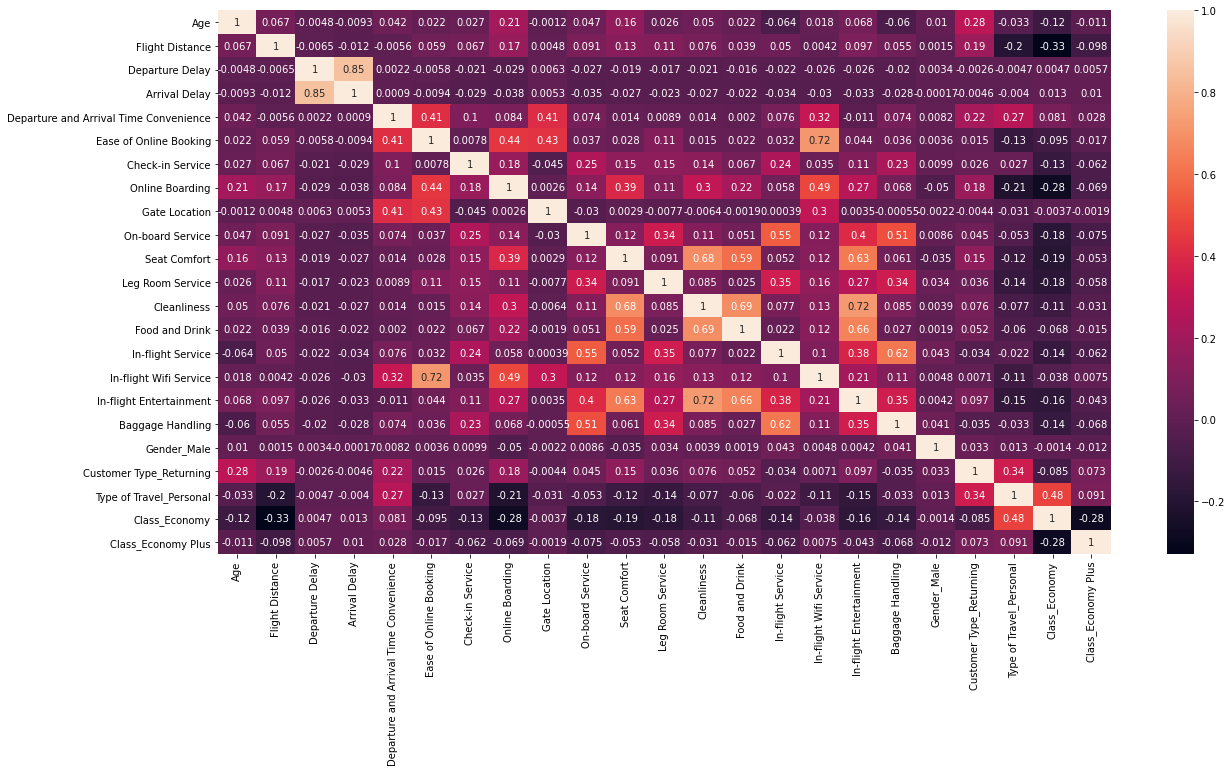

In [222]:
plt.figure(figsize=(20,10))
sns.heatmap(corrmatrix,annot=True)
plt.show()

After visualizing, we observed that `Arrival Delay`and `Departure Delay` having strong correlation. 

In [223]:
# finding correlation among features 
def correlation(df,threshold):
    correlated_cols = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_cols.add(colname)
    return correlated_cols

In [224]:
# finding correlation features who having more than 60%
corr_feature = correlation(Xtrain,0.6)
corr_feature

{'Arrival Delay',
 'Baggage Handling',
 'Cleanliness',
 'Food and Drink',
 'In-flight Entertainment',
 'In-flight Wifi Service'}

In [225]:
Xtrain.shape, Xtest.shape

((103046, 23), (11450, 23))

In [226]:
# Drop those feature
Xtrain.drop(labels=corr_feature,axis=1,inplace=True)
Xtest.drop(labels=corr_feature,axis=1,inplace=True)

In [227]:
Xtrain.shape,Xtest.shape

((103046, 17), (11450, 17))

##### `using summary of logit regression results we will check wheather feature having multicollinearity.

In [232]:
import statsmodels.api as sm
#Model statistics
#Must add constant for y-intercept
model = sm.Logit(ytrain, sm.add_constant(Xtrain)).fit()
y_pred = model.predict(sm.add_constant(Xtest))
print_model = model.summary()
print(print_model)

Optimization terminated successfully.
         Current function value: 0.352385
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Satisfaction   No. Observations:               103046
Model:                          Logit   Df Residuals:                   103028
Method:                           MLE   Df Model:                           17
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:                  0.4796
Time:                        11:52:51   Log-Likelihood:                -36312.
converged:                       True   LL-Null:                       -69773.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -7.2019   

#### Now again build logistic regression model to check accuracy after removing multicollinearity

In [229]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(Xtrain,ytrain)

LogisticRegression()

In [230]:
ypred = logistic.predict(Xtest)
print("accuracy_score for Logistic after multi-collinearity", round(accuracy_score(ypred,ytest),2))

accuracy_score for Logistic after multi-collinearity 0.81


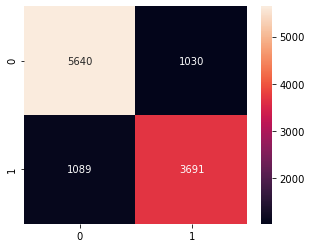

In [231]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(ypred,ytest),annot=True,fmt='g')
plt.show()

### Now again remove Gate Location feature form the data.
## Drop Gate Location

In [234]:
# Drop those feature
Xtrain.drop('Gate Location',axis=1,inplace=True)
Xtest.drop('Gate Location',axis=1,inplace=True)

In [235]:
Xtrain.shape,Xtest.shape

((103046, 16), (11450, 16))

In [238]:
import statsmodels.api as sm
#Model statistics
#Must add constant for y-intercept
model1 = sm.Logit(ytrain, sm.add_constant(Xtrain)).fit()
y_pred = model1.predict(sm.add_constant(Xtest))
print_model1 = model1.summary()
print(print_model1)

Optimization terminated successfully.
         Current function value: 0.352401
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Satisfaction   No. Observations:               103046
Model:                          Logit   Df Residuals:                   103029
Method:                           MLE   Df Model:                           16
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:                  0.4795
Time:                        12:10:37   Log-Likelihood:                -36314.
converged:                       True   LL-Null:                       -69773.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -7.1712   

In [241]:
from sklearn.linear_model import LogisticRegression
logistic1 = LogisticRegression()
logistic1.fit(Xtrain,ytrain)

LogisticRegression()

In [242]:
ypred = logistic1.predict(Xtest)
print("accuracy_score for Logistic after multi-collinearity", round(accuracy_score(ypred,ytest),2))

accuracy_score for Logistic after multi-collinearity 0.81
